In [48]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
meeses = pd.merge(study_results,mouse_metadata, how= "left", on=["Mouse ID","Mouse ID"])
# Display the data table for preview
#meeses.value_counts(["Mouse ID"])
meeses.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [36]:
#checking the number of mice
mousecnt = len(meeses["Mouse ID"].unique())
mousecnt

249

In [54]:
meeses[meeses.duplicated(["Mouse ID", "Timepoint"])]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [49]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
newmeeses = meeses.drop_duplicates(["Mouse ID","Timepoint"])
#newmeeses.value_counts(["Mouse ID"])
newmeeses.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [69]:
#check the number of mice
newmeeses.value_counts(["Mouse ID"])

Mouse ID
a203        10
l897        10
m546        10
m550        10
m601        10
            ..
x226         1
b447         1
f932         1
l872         1
n482         1
Length: 249, dtype: int64

In [70]:
groupedmeesesdrug = newmeeses.groupby("Drug Regimen")
avgoftumor= groupedmeesesdrug["Tumor Volume (mm3)"].mean()
medianoftumor = groupedmeesesdrug["Tumor Volume (mm3)"].median()
varianceoftumor = groupedmeesesdrug["Tumor Volume (mm3)"].var()
stdofvariance = groupedmeesesdrug["Tumor Volume (mm3)"].std()
groupdrug = pd.DataFrame({"Average": avgoftumor, "Median": medianoftumor, "Variance" : varianceoftumor, "Standard Deviation" : stdofvariance })
groupdrug

,Average,Median,Variance,Standard Deviation
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774
Ceftamin,52.591172,51.776157,39.290177,6.268188
Infubinol,52.884795,51.820584,43.128684,6.567243
Ketapril,55.235638,53.698743,68.553577,8.279709
Naftisol,54.331565,52.509285,66.173479,8.134708
Placebo,54.033581,52.288934,61.168083,7.821003
Propriva,52.393463,50.909965,43.138803,6.568014
Ramicane,40.216745,40.673236,23.486704,4.846308
Stelasyn,54.233149,52.431737,59.450562,7.710419


In [104]:
aggmeese = groupedmeesesdrug["Tumor Volume (mm3)"].agg(["mean", "median", "var","std","count"])
aggmeese.columns = ["Average", "Median", "Variance","Standard Deviation","count"]
aggmeese.reset_index(inplace=True)
aggmeese

,Drug Regimen,Average,Median,Variance,Standard Deviation,count
0,Capomulin,40.675741,41.557809,24.947764,4.994774,230
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,178
2,Infubinol,52.884795,51.820584,43.128684,6.567243,178
3,Ketapril,55.235638,53.698743,68.553577,8.279709,188
4,Naftisol,54.331565,52.509285,66.173479,8.134708,186
5,Placebo,54.033581,52.288934,61.168083,7.821003,181
6,Propriva,52.393463,50.909965,43.138803,6.568014,156
7,Ramicane,40.216745,40.673236,23.486704,4.846308,228
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,181
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,182


<AxesSubplot:xlabel='Drug Regimen'>

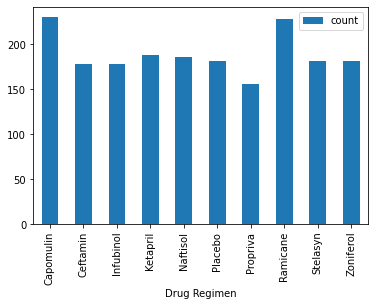

In [82]:
#using pandas
aggmeese.plot.bar(x ="Drug Regimen", y = "count")

<function matplotlib.pyplot.show(close=None, block=None)>

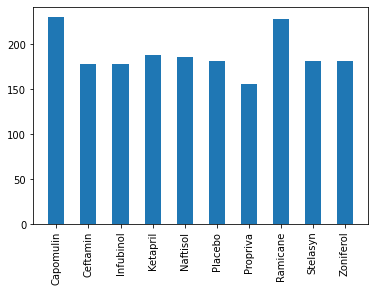

In [88]:
plt.bar(aggmeese["Drug Regimen"], aggmeese["count"], width=.5)
plt.xticks(rotation="vertical", )
plt.show

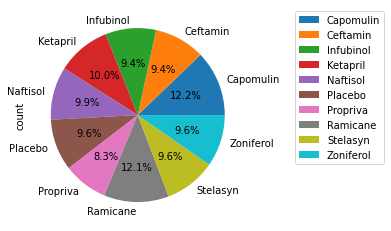

In [103]:
aggmeese.plot.pie(y = "count", labels = aggmeese["Drug Regimen"],autopct = "%.1f%%")
plt.legend(bbox_to_anchor=(1.2,1))

([<matplotlib.patches.Wedge at 0x257dc99f610>,
 [Text(1.0204194928737198, 0.4107846863788144, 'Capomulin'),
  Text(0.5362052726346711, 0.9604602571677697, 'Ceftamin'),
  Text(-0.091413334888149, 1.0961950566412109, 'Infubinol'),
  Text(-0.7020686278776361, 0.8468173603263065, 'Ketapril'),
  Text(-1.064081187039184, 0.2788032054860229, 'Naftisol'),
  Text(-1.0316298255570249, -0.381758959320122, 'Placebo'),
  Text(-0.6706052107628784, -0.8719453258649167, 'Propriva'),
  Text(-0.01830287505144982, -1.0998477188978715, 'Ramicane'),
  Text(0.6778365030103217, -0.8663357750818894, 'Stelasyn'),
  Text(1.0499413351770992, -0.32805973950872136, 'Zoniferol')],
 [Text(0.5565924506583925, 0.22406437438844418, '12.2%'),
  Text(0.2924756032552751, 0.5238874130006016, '9.4%'),
  Text(-0.049861819029899446, 0.5979245763497513, '9.4%'),
  Text(-0.3829465242968924, 0.46190037835980347, '10.0%'),
  Text(-0.5804079202031912, 0.15207447571964883, '9.9%'),
  Text(-0.562707177576559, -0.20823215962915742, '

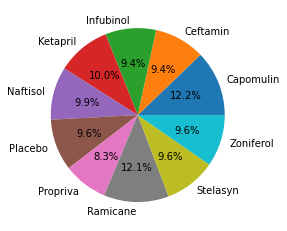

In [102]:
plt.pie(aggmeese["count"],labels =aggmeese["Drug Regimen"],autopct = "%.1f%%")